# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rangga Julian Syaputra
- **Email:** ranggajs235@student.ub.ac.id
- **ID Dicoding:** ranggajulian01





## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca dan waktu memengaruhi jumlah penyewaan sepeda?
- Kapan waktu terbaik untuk meningkatkan layanan penyewaan sepeda?
- Bagaimana perbedaan pola penggunaan sepeda antara pelanggan kasual dan terdaftar?
- Bagaimana dampak hari libur terhadap jumlah penyewaan sepeda?
- Bagaimana dampak hari kerja dan akhir pekan terhadap permintaan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Data Wrangling

### Gathering Data

**load tabel day**

In [ ]:
day_df = pd.read_csv("/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**load tabel hour**

In [ ]:
hour_df = pd.read_csv("/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight day_df.head():**
- Hari kerja lebih ramai (workingday, cnt) → Penyewaan lebih tinggi pada hari kerja dibandingkan hari libur.
- Pengguna terdaftar dominan (registered, casual) → Lebih banyak penyewaan oleh pengguna terdaftar dibandingkan pengguna kasual.
- Cuaca berpengaruh (weathersit, hum, cnt) → Penyewaan meningkat saat cuaca cerah dan kelembaban rendah.
- Suhu rendah lebih nyaman (temp, atemp, cnt) → Penyewaan lebih tinggi saat suhu lebih rendah.
- Hari libur tidak selalu ramai (holiday, cnt) → Penyewaan tetap rendah meskipun hari libur.

**Insight hour_df.head():**
- Sewa meningkat di pagi hari (hr, cnt) → Jumlah penyewa cenderung meningkat setelah tengah malam.
- Pengguna terdaftar lebih dominan (registered, casual) → Penyewaan lebih banyak dilakukan oleh pengguna terdaftar.
- Cuaca cerah tidak selalu meningkatkan penyewaan (weathersit, cnt) → Meskipun cuaca baik, jumlah penyewaan tetap rendah.
- Kelembaban tinggi mengurangi penyewaan (hum, cnt) → Hari dengan kelembaban tinggi menunjukkan jumlah penyewaan rendah.
- Kecepatan angin nol tidak selalu meningkatkan sewa (windspeed, cnt) → Meskipun tidak ada angin, jumlah penyewaan tetap rendah.


### Assessing Data

**Menilai Data day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Data hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Kurang lebih kedua file memiliki permasalahan yang sama sebagai berikut:

- Tidak ada missing value → Semua kolom data lengkap tanpa nilai yang hilang.
- Kolom tanggal sebagai objek (dteday) → Perlu diubah ke format datetime untuk analisis berbasis waktu.
- Mayoritas kolom numerik (int64, float64) → Memudahkan analisis statistik dan pemodelan.
- Dataset berukuran kecil → Dapat diproses dengan cepat tanpa kebutuhan sumber daya besar.
- Skala fitur cuaca perlu dikonversi ke nilai asli: temp dikali 41, atemp dikali 50, hum dikali 100, windspeed dikali 67.
- Cek apakah ada nilai di luar rentang 1-4 pada weathersit → Jika ada, berarti terdapat data yang tidak valid.
- Cek apakah cnt == casual + registered → Jika tidak, ada kesalahan dalam data yang perlu diperbaiki.


### Cleaning Data

Pada tahap ini saya melakukan:
1. Mengonversi kolom dteday ke format datetime untuk analisis berbasis waktu.
2. Mengembalikan skala fitur cuaca ke nilai asli dengan mengalikan temp, atemp, hum, dan windspeed dengan faktor skalanya.
3. Memastikan semua nilai weathersit berada dalam rentang valid (1-4).
4. Memeriksa konsistensi cnt dengan jumlah casual + registered dan memastikan tidak ada kesalahan perhitungan.
5. Mengecek statistik dataset setelah pembersihan untuk memastikan tidak ada missing values dan semua kolom memiliki format data yang sesuai.

**Membersihkan Data day_df**

In [12]:
# Kolom tanggal sebagai objek (dteday) → Perlu diubah ke format datetime untuk analisis berbasis waktu.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print("==== DATASET SETELAH KONVERSI 'dteday' KE DATETIME ====")
day_df.dtypes

==== DATASET SETELAH KONVERSI 'dteday' KE DATETIME ====


,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [13]:
#Fitur kategori dalam bentuk numerik (season, weathersit, weekday, dll.) → Bisa dikonversi ke kategori untuk interpretasi lebih baik.
day_df['temp'] = day_df['temp'] * 41  # suhu dalam Celsius
day_df['atemp'] = day_df['atemp'] * 50  # suhu terasa dalam Celsius
day_df['hum'] = day_df['hum'] * 100  # kelembaban dalam persen
day_df['windspeed'] = day_df['windspeed'] * 67  # kecepatan angin dalam satuan asli
print("==== DATASET SETELAH DENORMALISASI ====")
day_df[['temp', 'atemp', 'hum', 'windspeed']].head(20)

==== DATASET SETELAH DENORMALISASI ====


,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300
5,8.378268,11.66045,51.8261,6.000868
6,8.057402,10.44195,49.8696,11.304642
7,6.765000,8.11270,53.5833,17.875868
8,5.671653,5.80875,43.4167,24.250650
9,6.184153,7.54440,48.2917,14.958889


In [14]:
#Cek apakah ada nilai di luar rentang 1-4 pada weathersit → Jika ada, berarti terdapat data yang tidak valid.
invalid_weathersit = day_df[~day_df["weathersit"].between(1, 4)]

if not invalid_weathersit.empty:
    print("Terdapat nilai tidak valid pada kolom 'weathersit':")
    print(invalid_weathersit[["dteday", "weathersit"]])
else:
    print("Semua nilai pada kolom 'weathersit' berada dalam rentang yang valid (1-4).")

Semua nilai pada kolom 'weathersit' berada dalam rentang yang valid (1-4).


In [15]:
#Cek apakah cnt == casual + registered → Jika tidak, ada kesalahan dalam data yang perlu diperbaiki.
mismatch_rows = day_df[day_df["cnt"] != (day_df["casual"] + day_df["registered"])]

if not mismatch_rows.empty:
    print("Ada ketidaksesuaian antara cnt dan jumlah casual + registered pada baris berikut:")
    print(mismatch_rows.index.tolist())
else:
    print("Data sesuai, tidak ada perbedaan.")

Data sesuai, tidak ada perbedaan.


In [16]:
# Statistik deskriptif setelah cleaning
print("==== STATISTIK SETELAH CLEANING ====")
day_df.describe()

==== STATISTIK SETELAH CLEANING ====


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [17]:
#Tampilkan hasil info setelah cleaning
print("==== DATASET SETELAH SEMUA CLEANING ====")
day_df.info()
print()
day_df.head()

==== DATASET SETELAH SEMUA CLEANING ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Membersihkan Data hour_df**

In [18]:
# Kolom tanggal sebagai objek (dteday) → Perlu diubah ke format datetime untuk analisis berbasis waktu.
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print("==== DATASET SETELAH KONVERSI 'dteday' KE DATETIME ====")
hour_df.dtypes

==== DATASET SETELAH KONVERSI 'dteday' KE DATETIME ====


,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [19]:
#Skala fitur cuaca perlu dikonversi ke nilai asli: temp dikali 41, atemp dikali 50, hum dikali 100, windspeed dikali 67.
hour_df['temp'] = hour_df['temp'] * 41  # suhu dalam Celsius
hour_df['atemp'] = hour_df['atemp'] * 50  # suhu terasa dalam Celsius
hour_df['hum'] = hour_df['hum'] * 100  # kelembaban dalam persen
hour_df['windspeed'] = hour_df['windspeed'] * 67  # kecepatan angin dalam satuan asli
print("==== DATASET SETELAH DENORMALISASI ====")
hour_df[['temp', 'atemp', 'hum', 'windspeed']].head(20)

==== DATASET SETELAH DENORMALISASI ====


,temp,atemp,hum,windspeed
0,9.84,14.395,81.0,0.0000
1,9.02,13.635,80.0,0.0000
2,9.02,13.635,80.0,0.0000
3,9.84,14.395,75.0,0.0000
4,9.84,14.395,75.0,0.0000
5,9.84,12.880,75.0,6.0032
6,9.02,13.635,80.0,0.0000
7,8.20,12.880,86.0,0.0000
8,9.84,14.395,75.0,0.0000
9,13.12,17.425,76.0,0.0000


In [20]:
#Cek apakah ada nilai di luar rentang 1-4 pada weathersit → Jika ada, berarti terdapat data yang tidak valid.
invalid_weathersit = hour_df[~hour_df["weathersit"].between(1, 4)]

if not invalid_weathersit.empty:
    print("Terdapat nilai tidak valid pada kolom 'weathersit':")
    print(invalid_weathersit[["dteday", "weathersit"]])
else:
    print("Semua nilai pada kolom 'weathersit' berada dalam rentang yang valid (1-4).")


Semua nilai pada kolom 'weathersit' berada dalam rentang yang valid (1-4).


In [21]:
#Cek apakah cnt == casual + registered → Jika tidak, ada kesalahan dalam data yang perlu diperbaiki.
mismatch_rows = hour_df[hour_df["cnt"] != (hour_df["casual"] + hour_df["registered"])]

if not mismatch_rows.empty:
    print("Ada ketidaksesuaian antara cnt dan jumlah casual + registered pada baris berikut:")
    print(mismatch_rows.index.tolist())
else:
    print("Data sesuai, tidak ada perbedaan.")

Data sesuai, tidak ada perbedaan.


In [22]:
# Statistik deskriptif setelah cleaning
print("==== STATISTIK SETELAH CLEANING ====")
hour_df.describe()

==== STATISTIK SETELAH CLEANING ====


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [23]:
#Tampilkan hasil info setelah cleaning
print("==== DATASET SETELAH SEMUA CLEANING ====")
hour_df.info()
print()
hour_df.head()

==== DATASET SETELAH SEMUA CLEANING ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  i

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


**Insight hasil clenaing untuk kedua file (karena permasalahan kurang lebih sama:**
- ✔ Tidak Ada Missing Value → Semua kolom memiliki data lengkap, tidak ada nilai yang hilang.
- ✔ Kolom dteday Dikubah ke Format datetime64 → Siap digunakan untuk analisis berbasis waktu.
- ✔ Mayoritas Kolom Berbentuk Numerik (int64, float64) → Memudahkan analisis statistik dan pemodelan.
- ✔ Dataset Berukuran Kecil → Dapat diproses dengan cepat tanpa membutuhkan sumber daya besar.
- ✔ Skala Fitur Cuaca Dikembalikan ke Nilai Asli → temp dikalikan 41, atemp dikalikan 50, hum dikalikan 100, windspeed dikalikan 67.
- ✔ Validasi Data weathersit → Semua nilai berada dalam rentang 1-4, tidak ada data tidak valid.
- ✔ Konsistensi cnt dengan casual + registered → Data telah diverifikasi, hasilnya konsisten tanpa kesalahan perhitungan.

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi Data day_df**

Pada tahap ini saya melakukan:
1. Melihat statistik deskriptif keseluruhan menggunakan describe(include="all"), untuk mendapatkan ringkasan distribusi data.
2. Menganalisis jumlah penyewaan berdasarkan kondisi cuaca dengan groupby("weathersit"), untuk mengetahui rata-rata, maksimum, dan minimum jumlah penyewaan sepeda dalam kondisi cuaca tertentu.
3. Menganalisis pengaruh musim terhadap penyewaan sepeda dengan groupby("season"), untuk melihat bagaimana suhu, kelembaban, dan kecepatan angin berhubungan dengan jumlah penyewaan.
4. Menganalisis pola penyewaan bulanan dengan groupby("mnth"), untuk mengetahui bulan dengan penyewaan tertinggi.
5. Menganalisis pola penyewaan harian dengan groupby("weekday"), guna menentukan hari dengan penyewaan tertinggi.
6. Membandingkan pelanggan kasual dan terdaftar di hari kerja dan akhir pekan dengan groupby("workingday"), untuk melihat apakah pelanggan kasual lebih banyak di akhir pekan.
7. Menganalisis pola penyewaan saat hari libur vs hari biasa dengan groupby("holiday"), untuk melihat perbedaan pola penggunaan sepeda.
8. Membandingkan pola penyewaan di hari kerja dan akhir pekan dengan groupby(["workingday", "weekday"]), guna memahami bagaimana jumlah pelanggan kasual dan terdaftar berubah berdasarkan hari kerja dan akhir pekan.

In [24]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [25]:
#Melihat rata-rata, maksimum, dan minimum jumlah penyewaan sepeda berdasarkan kondisi cuaca.
day_df.groupby("weathersit").agg({
    "cnt": ["mean", "max", "min"],
    "casual": ["mean", "max"],
    "registered": ["mean", "max"]
})

cnt                 casual         registered      
                   mean   max  min        mean   max         mean   max
weathersit                                                             
1           4876.786177  8714  431  964.030238  3410  3912.755940  6946
2           4035.862348  8362  605  687.352227  3155  3348.510121  6844
3           1803.285714  4639   22  185.476190  1264  1617.809524  4324

In [26]:
#Melihat bagaimana musim memengaruhi jumlah penyewaan dan kondisi cuaca.
day_df.groupby("season").agg({
    "cnt": ["mean", "max", "min"],
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
})

cnt                   temp        hum  windspeed
               mean   max   min       mean       mean       mean
season                                                          
1       2604.132597  7836   431  12.207650  58.290291  14.373984
2       4992.331522  8362   795  22.320611  62.694833  13.634978
3       5644.303191  8714  1115  28.958682  63.348206  11.530366
4       4728.162921  8555    22  17.339148  66.871917  11.523637

In [27]:
#Melihat pola penyewaan bulanan untuk mengetahui bulan dengan penyewaan tertinggi.
day_df.groupby("mnth").agg({
    "cnt": ["mean", "max", "min"],
    "casual": "mean",
    "registered": "mean"
})


cnt                   casual   registered
             mean   max   min         mean         mean
mnth                                                   
1     2176.338710  4521   431   194.225806  1982.112903
2     2655.298246  5062  1005   262.508772  2392.789474
3     3692.258065  8362   605   716.838710  2975.419355
4     4484.900000  7460   795  1013.366667  3471.533333
5     5349.774194  8294  2633  1214.274194  4135.500000
6     5772.366667  8120  3767  1231.766667  4540.600000
7     5563.677419  8173  3285  1260.596774  4303.080645
8     5664.419355  7865  1115  1161.919355  4502.500000
9     5766.516667  8714  1842  1172.050000  4594.466667
10    5199.225806  8156    22   963.870968  4235.354839
11    4247.183333  6852  1495   610.050000  3637.133333
12    3403.806452  6606   441   349.887097  3053.919355

In [28]:
#Mengevaluasi pola penyewaan harian untuk menentukan hari sibuk.
day_df.groupby("weekday").agg({
    "cnt": ["mean", "max"],
    "casual": "mean",
    "registered": "mean"
})

cnt             casual   registered
                mean   max         mean         mean
weekday                                             
0        4228.828571  8227  1338.295238  2890.533333
1        4338.123810  7525   674.133333  3663.990476
2        4510.663462  7767   556.182692  3954.480769
3        4548.538462  8173   551.144231  3997.394231
4        4667.259615  7804   590.961538  4076.298077
5        4690.288462  8362   752.288462  3938.000000
6        4550.542857  8714  1465.257143  3085.285714

In [29]:
#Melihat apakah pelanggan kasual lebih banyak di akhir pekan dibandingkan pelanggan terdaftar.
day_df.groupby("workingday").agg({
    "casual": ["mean", "max"],
    "registered": ["mean", "max"],
    "cnt": ["mean", "max"]
})

casual         registered                cnt      
                   mean   max         mean   max         mean   max
workingday                                                         
0           1371.134199  3410  2959.034632  5966  4330.168831  8714
1            606.570000  2469  3978.250000  6946  4584.820000  8362

In [30]:
#Menganalisis perbedaan pola penyewaan saat hari libur vs hari biasa.
day_df.groupby("holiday").agg({
    "cnt": ["mean", "max"],
    "casual": "mean",
    "registered": "mean"
})

cnt             casual   registered
                mean   max         mean         mean
holiday                                             
0        4527.104225  8714   841.771831  3685.332394
1        3735.000000  7403  1064.714286  2670.285714

In [31]:
#Membandingkan pola penyewaan di hari kerja dan akhir pekan berdasarkan jumlah pelanggan kasual dan terdaftar.
day_df.groupby(["workingday", "weekday"]).agg({
    "cnt": ["mean", "max"],
    "casual": "mean",
    "registered": "mean"
})

cnt             casual   registered
                           mean   max         mean         mean
workingday weekday                                             
0          0        4228.828571  8227  1338.295238  2890.533333
           1        3973.666667  6370  1117.333333  2856.333333
           2        1013.000000  1013   440.000000   573.000000
           3        7403.000000  7403  2562.000000  4841.000000
           4        1960.000000  2425   757.500000  1202.500000
           5        3247.000000  3368   541.000000  2706.000000
           6        4550.542857  8714  1465.257143  3085.285714
1          1        4398.866667  7525   600.266667  3798.600000
           2        4544.621359  7767   557.310680  3987.310680
           3        4520.825243  8173   531.621359  3989.203883
           4        4720.343137  7804   587.696078  4132.647059
           5        4718.588235  8362   756.431373  3962.156863

**Eksplorasi Data hour_df**

Pada tahap ini saya melakukan:
1. Melihat statistik deskriptif keseluruhan menggunakan describe(include="all"), yang memberikan gambaran umum tentang distribusi data, seperti rata-rata, min, max, dan kuartil.
2. Menganalisis rata-rata penyewaan sepeda per jam dengan groupby('hr'), untuk memahami pola penggunaan sepeda sepanjang hari.
3. Menganalisis rata-rata penyewaan sepeda berdasarkan jam dan hari kerja dengan groupby(['workingday', 'hr']), untuk membandingkan pola penggunaan sepeda pada hari kerja dan hari libur.

In [32]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [33]:
#Rata-rata penyewaan sepeda berdasarkan jam
hour_df.groupby('hr')['cnt'].mean().reset_index()


,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [34]:
#Rata-rata penyewaan sepeda berdasarkan jam dan hari kerja
hour_df.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()


,workingday,hr,cnt
0,0,0,90.800000
1,0,1,69.508696
2,0,2,53.171053
3,0,3,25.775330
4,0,4,8.264317
5,0,5,8.689189
6,0,6,18.742358
7,0,7,43.406926
8,0,8,105.653680
9,0,9,171.623377


**Eksplorasi Data all_df**

Pada tahap ini saya melakukan:
1. Menggabungkan (merge) day_df dan hour_df berdasarkan dteday, untuk mendapatkan data yang lebih detail per jam.
2. Membersihkan kolom yang tidak diperlukan, yaitu menghapus kolom dengan suffix _x dan menghilangkan suffix _y untuk menjaga konsistensi nama kolom.
3. Menganalisis pengaruh cuaca dan waktu terhadap jumlah penyewaan sepeda dengan menghitung total, rata-rata, dan standar deviasi penyewaan berdasarkan weathersit, season, dan hr.
4. Menentukan waktu terbaik untuk layanan sepeda dengan melihat total penyewaan, median, dan jumlah transaksi per jam.
5. Menganalisis pola penggunaan sepeda antara pengguna kasual dan terdaftar, dengan melihat total dan rata-rata penyewaan berdasarkan hr dan weekday.
6. Mengevaluasi dampak hari libur terhadap jumlah penyewaan dengan menghitung total, rata-rata, serta nilai minimum dan maksimum.
7. Menganalisis perbedaan antara hari kerja dan akhir pekan dengan melihat distribusi penyewaan (q1 dan q3) untuk memahami pola permintaan sepeda.

In [35]:
# Merge day_df dan hour_df
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",  # Bisa juga "left" jika ingin semua data harian tetap ada
    on="dteday"   # Menggunakan dteday sebagai kunci
)

# Menampilkan beberapa baris pertama hasil merge
all_df.head()


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [36]:
# Menghapus kolom "_x" yang berasal dari day_df karena data hourly lebih detail
all_df = all_df.drop(columns=[col for col in all_df.columns if col.endswith('_x')])

# Menghapus suffix "_y" agar lebih bersih
all_df.columns = [col.replace('_y', '') for col in all_df.columns]

# Tampilkan hasil
all_df.head()


,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [37]:
# 1. Pengaruh faktor cuaca dan waktu terhadap jumlah penyewaan sepeda
all_df.groupby(['weathersit', 'season', 'hr']).agg(
    total_sewa=('cnt', 'sum'),
    rata_rata_sewa=('cnt', 'mean'),
    sebaran_sewa=('cnt', 'std')
).reset_index()


,weathersit,season,hr,total_sewa,rata_rata_sewa,sebaran_sewa
0,1,1,0,3033,28.885714,22.354794
1,1,1,1,1957,18.120370,20.188235
2,1,1,2,1209,11.625000,14.397402
3,1,1,3,686,7.297872,9.877562
4,1,1,4,313,3.226804,3.160647
...,...,...,...,...,...,...
286,3,4,22,1179,73.687500,58.950509
287,3,4,23,618,44.142857,22.954326
288,4,1,1,23,23.000000,NaN
289,4,1,16,36,36.000000,NaN


In [38]:

# 2. Waktu terbaik untuk meningkatkan layanan penyewaan sepeda
all_df.groupby(['hr']).agg(
    total_sewa=('cnt', 'sum'),
    median_sewa=('cnt', 'median'),
    jumlah_transaksi=('cnt', 'count')
).reset_index().sort_values('total_sewa', ascending=False)


,hr,total_sewa,median_sewa,jumlah_transaksi
17,17,336860,475.0,730
18,18,309772,418.5,728
8,8,261001,385.0,727
16,16,227748,304.5,730
19,19,226789,309.5,728
13,13,184919,224.0,729
12,12,184414,229.0,728
15,15,183149,227.0,729
14,14,175652,212.0,729
20,20,164550,223.5,728


In [39]:

# 3. Perbedaan pola penggunaan sepeda antara pelanggan kasual dan terdaftar
all_df.groupby(['hr', 'weekday']).agg(
    total_kasual=('casual', 'sum'),
    rata_kasual=('casual', 'mean'),
    total_terdaftar=('registered', 'sum'),
    rata_terdaftar=('registered', 'mean')
).reset_index()


,hr,weekday,total_kasual,rata_kasual,total_terdaftar,rata_terdaftar
0,0,0,1896,18.230769,7879,75.759615
1,0,1,989,9.419048,2582,24.590476
2,0,2,583,5.772277,2207,21.851485
3,0,3,611,5.875000,2983,28.682692
4,0,4,705,6.844660,3340,32.427184
...,...,...,...,...,...,...
163,23,2,1122,10.788462,6800,65.384615
164,23,3,1255,12.184466,7370,71.553398
165,23,4,1386,13.326923,8676,83.423077
166,23,5,2027,19.490385,9955,95.721154


In [40]:

# 4. Dampak hari libur terhadap jumlah penyewaan sepeda
all_df.groupby('holiday').agg(
    total_sewa=('cnt', 'sum'),
    rata_rata_sewa=('cnt', 'mean'),
    min_sewa=('cnt', 'min'),
    max_sewa=('cnt', 'max')
).reset_index()


,holiday,total_sewa,rata_rata_sewa,min_sewa,max_sewa
0,0,3214244,190.42858,1,977
1,1,78435,156.87000,1,712


In [41]:

# 5. Dampak hari kerja dan akhir pekan terhadap permintaan penyewaan sepeda
all_df.groupby('workingday').agg(
    total_sewa=('cnt', 'sum'),
    rata_rata_sewa=('cnt', 'mean'),
    q1_sewa=('cnt', lambda x: x.quantile(0.25)),
    q3_sewa=('cnt', lambda x: x.quantile(0.75))
).reset_index()


,workingday,total_sewa,rata_rata_sewa,q1_sewa,q3_sewa
0,0,1000269,181.405332,40.0,292.0
1,1,2292410,193.207754,40.0,277.0


**Insight explorasi day_df:**
- Penyewaan tertinggi terjadi saat cuaca cerah (weathersit = 1) dengan rata-rata 4876 sepeda per hari.
- Saat cuaca buruk (weathersit = 3), penyewaan turun drastis menjadi 1803 sepeda per hari.
- Musim panas (season = 3) memiliki rata-rata penyewaan tertinggi (5644 sepeda/hari).
- Musim dingin (season = 1) memiliki rata-rata penyewaan terendah (2604 sepeda/hari).
- Puncak penyewaan terjadi pada bulan September (5766 sepeda/hari).
- Penyewaan terendah terjadi di bulan Januari (2176 sepeda/hari).
- Hari Sabtu (weekday = 6) memiliki jumlah penyewaan tertinggi dengan rata-rata 4550 sepeda/hari.
- Hari Senin (weekday = 1) memiliki penyewaan lebih rendah (4338 sepeda/hari), menunjukkan tren awal minggu yang sibuk.
- Pelanggan kasual (casual) lebih banyak di akhir pekan, dengan rata-rata 1371 penyewa per hari pada hari libur.
- Pelanggan terdaftar (registered) lebih banyak di hari kerja, dengan rata-rata 3978 penyewa per hari.
- Pada hari libur (workingday = 0), total penyewaan lebih rendah (4330 sepeda/hari) dibanding hari kerja (4584 sepeda/hari).
- Namun, pelanggan kasual (casual) lebih banyak di hari libur (1371/hari) dibanding hari kerja (607/hari).

**Insight explorasi hour_df:**
- Peminjaman sepeda rendah dini hari (0-5), mulai naik dari jam 6, dan memuncak di jam 8 dan 17.
- Jam 8 pagi (359) → kemungkinan jam berangkat kerja/sekolah.
- Jam 17 sore (461) → kemungkinan jam pulang kerja/sekolah.
- Hari kerja (workingday=1): Puncak peminjaman di jam 7-9 pagi dan 16-18 sore → konsisten dengan jam commuting.
- Hari libur (workingday=0): Peminjaman lebih merata sepanjang siang, dengan puncak di jam 11-15.
- Malam hari (22-23) peminjaman turun signifikan di kedua kategori.
- Hari kerja (workingday=1) → Peminjaman sepeda jauh lebih tinggi di jam commuting.
- Hari libur (workingday=0) → Peminjaman lebih santai dan meningkat di tengah hari, terutama siang-sore.

**Insight explorasi all_df:**
1. Faktor Cuaca dan Waktu terhadap Penyewaan Sepeda
  - Cuaca yang lebih baik (weathersit = 1) cenderung meningkatkan jumlah penyewaan sepeda. Sebaliknya, cuaca buruk (weathersit = 3 atau 4) menunjukkan penurunan signifikan dalam jumlah penyewaan.
  - Musim juga memengaruhi jumlah penyewaan. Misalnya, pada musim ke-4 (kemungkinan musim dingin/hujan), jumlah penyewaan lebih rendah dibanding musim lainnya.
  - Pada jam-jam tertentu (seperti 17:00), jumlah penyewaan sepeda sangat tinggi, menandakan pola commuting pekerja/karyawan.

2. Waktu Terbaik untuk Meningkatkan Layanan Penyewaan Sepeda
  - Jam sibuk terjadi pada pukul 17:00 - 19:00, dengan total sewa tertinggi pada pukul 17:00. Ini kemungkinan besar adalah jam pulang kerja atau sekolah.
  - Pagi hari sekitar pukul 08:00 - 09:00 juga menunjukkan jumlah penyewaan yang tinggi, mendukung hipotesis bahwa banyak pengguna memakai sepeda untuk ke tempat kerja atau sekolah.
  - Waktu yang lebih sepi adalah dini hari (pukul 00:00 - 05:00), sehingga layanan bisa dikurangi pada jam ini untuk efisiensi.

3. Perbedaan Pola Penggunaan antara Pelanggan Kasual dan Terdaftar
  - Pengguna kasual lebih aktif pada akhir pekan, terlihat dari rata-rata penyewaan kasual yang lebih tinggi pada hari Sabtu dan Minggu.
  - Pengguna terdaftar lebih stabil dan cenderung menggunakan sepeda pada hari kerja, kemungkinan besar untuk keperluan transportasi rutin.
  - Pada jam-jam sibuk (pagi dan sore hari), jumlah pengguna terdaftar lebih tinggi dibandingkan pengguna kasual, menandakan peran sepeda sebagai moda transportasi utama bagi mereka.

4. Dampak Hari Libur terhadap Penyewaan Sepeda
  - Hari libur menunjukkan rata-rata penyewaan yang lebih rendah dibandingkan hari biasa (156 vs. 190 sewa per hari). Ini mungkin disebabkan oleh lebih sedikitnya orang yang bepergian untuk bekerja atau sekolah.
  - Namun, terdapat beberapa hari libur dengan jumlah penyewaan tinggi, kemungkinan besar karena cuaca cerah atau adanya acara khusus yang meningkatkan permintaan.

5. Dampak Hari Kerja vs. Akhir Pekan terhadap Permintaan
  - Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan. Hal ini menunjukkan bahwa penyewaan sepeda lebih banyak digunakan untuk kebutuhan transportasi harian.
  - Distribusi penyewaan di hari kerja lebih merata sepanjang hari, sedangkan pada akhir pekan cenderung naik di siang dan sore hari, yang bisa dikaitkan dengan aktivitas rekreasi.
  - Kuartil pertama (Q1) dan ketiga (Q3) menunjukkan bahwa variasi jumlah penyewaan di hari kerja lebih kecil, sedangkan pada akhir pekan bisa sangat fluktuatif.

## Visualization & Explanatory Analysis

Pada tahap ini saya melakukan:

1. Analisis pengaruh cuaca dan musim terhadap penyewaan sepeda menggunakan heatmap untuk melihat pola berdasarkan weathersit dan season.
2. Identifikasi waktu terbaik dengan line plot rata-rata penyewaan per jam (hr) untuk melihat jam-jam sibuk.
3. Perbandingan pola pelanggan kasual vs. terdaftar dengan line plot untuk casual dan registered.
4. Dampak hari libur menggunakan boxplot untuk membandingkan jumlah penyewaan antara hari libur (holiday) dan hari biasa.
5. Dampak hari kerja vs. akhir pekan dengan boxplot berdasarkan workingday untuk melihat perbedaan permintaan.

### Pertanyaan 1: Bagaimana faktor cuaca dan waktu memengaruhi jumlah penyewaan sepeda?


In [42]:
# Set gaya seaborn
sns.set_theme(style="whitegrid")

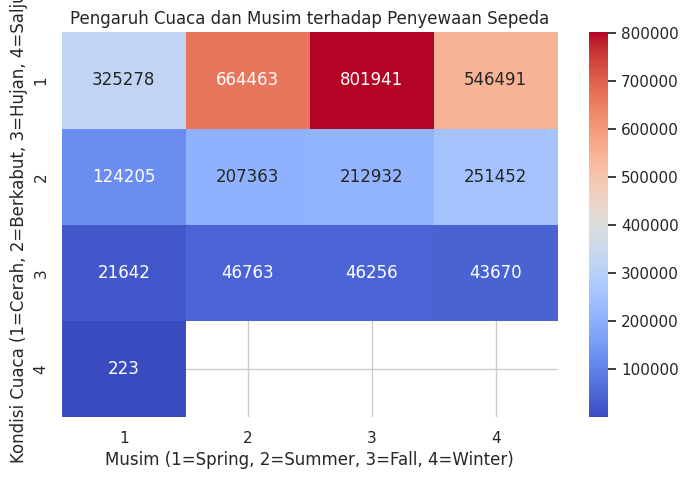

In [43]:
plt.figure(figsize=(8, 5))
weather_season = all_df.groupby(['weathersit', 'season'])['cnt'].sum().unstack()
sns.heatmap(weather_season, annot=True, cmap='coolwarm', fmt='g')

plt.title("Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda")
plt.xlabel("Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Kondisi Cuaca (1=Cerah, 2=Berkabut, 3=Hujan, 4=Salju)")
plt.show()

### Pertanyaan 2: Kapan waktu terbaik untuk meningkatkan layanan penyewaan sepeda?


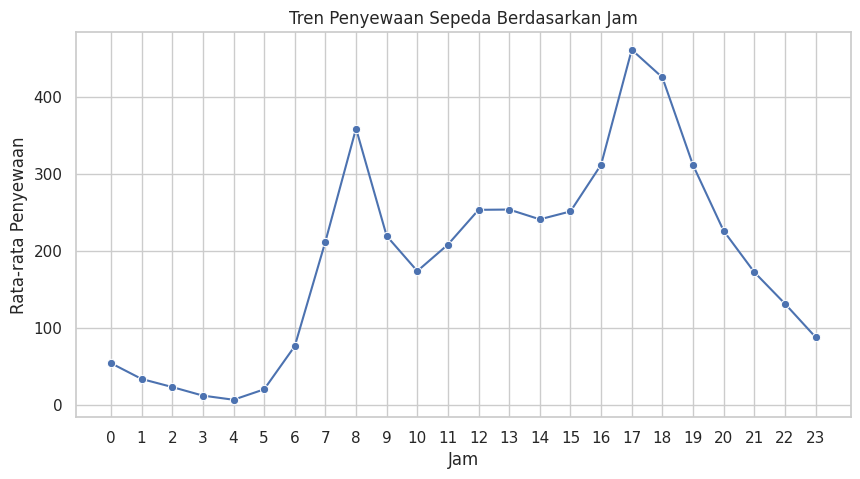

In [44]:
plt.figure(figsize=(10, 5))
hourly_rentals = all_df.groupby('hr')['cnt'].mean()
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')

plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana perbedaan pola penggunaan sepeda antara pelanggan kasual dan terdaftar?



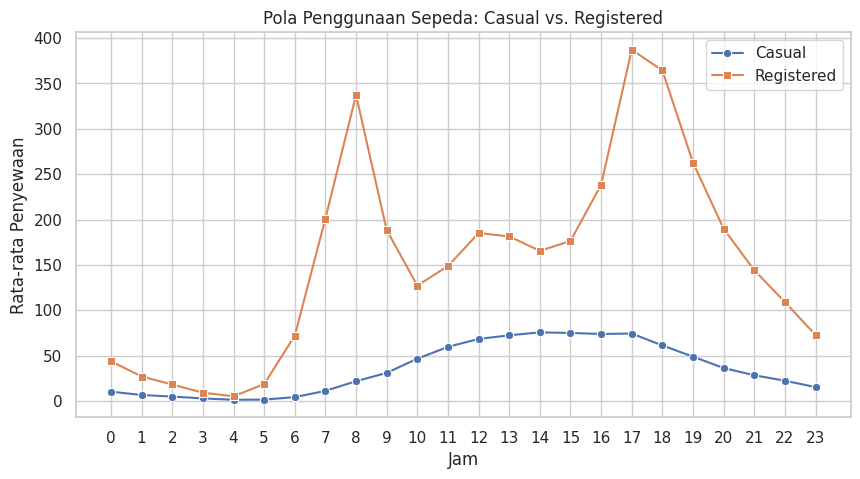

In [45]:
plt.figure(figsize=(10, 5))
casual_hourly = all_df.groupby('hr')['casual'].mean()
registered_hourly = all_df.groupby('hr')['registered'].mean()

sns.lineplot(x=casual_hourly.index, y=casual_hourly.values, label="Casual", marker='o')
sns.lineplot(x=registered_hourly.index, y=registered_hourly.values, label="Registered", marker='s')

plt.title("Pola Penggunaan Sepeda: Casual vs. Registered")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 4: Bagaimana dampak hari libur terhadap jumlah penyewaan sepeda?




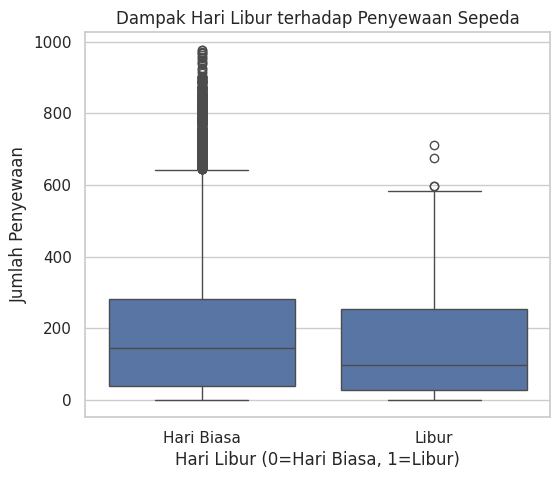

In [46]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=all_df['holiday'], y=all_df['cnt'])

plt.title("Dampak Hari Libur terhadap Penyewaan Sepeda")
plt.xlabel("Hari Libur (0=Hari Biasa, 1=Libur)")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1], ["Hari Biasa", "Libur"])
plt.show()

### Pertanyaan 5: Bagaimana dampak hari kerja dan akhir pekan terhadap permintaan penyewaan sepeda?


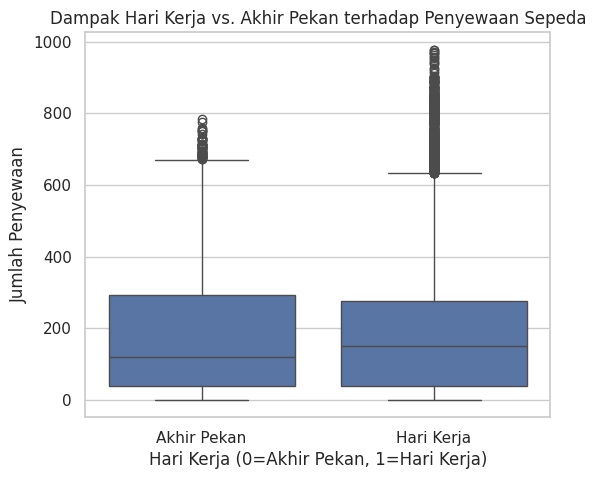

In [47]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=all_df['workingday'], y=all_df['cnt'])

plt.title("Dampak Hari Kerja vs. Akhir Pekan terhadap Penyewaan Sepeda")
plt.xlabel("Hari Kerja (0=Akhir Pekan, 1=Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.show()


**Insight visualisasi data sesuai pertanyaan:**
1. Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda
  - Cuaca cerah dan musim gugur memiliki jumlah penyewaan tertinggi, sementara cuaca bersalju dan musim semi memiliki jumlah penyewaan terendah.
  - Musim panas juga memiliki jumlah penyewaan yang tinggi, terutama saat cuaca cerah atau berawan.
  - Hujan dan salju secara signifikan mengurangi jumlah penyewaan sepeda.

2. Tren Penyewaan Sepeda Berdasarkan Jam
  - Peningkatan tajam terjadi pada pukul 7-8 pagi dan 17-18 sore, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja atau sekolah.
  - Aktivitas penyewaan cenderung rendah pada tengah malam hingga dini hari, lalu meningkat menjelang pagi.

3. Pola Penggunaan Sepeda: Casual vs. Registered
  - Pengguna terdaftar (registered) lebih dominan dibanding pengguna casual, terutama pada jam sibuk (7-9 pagi dan 17-19 sore).
  - Pengguna casual memiliki tren penggunaan yang lebih stabil sepanjang hari, tanpa lonjakan signifikan seperti pengguna terdaftar.

4. Dampak Hari Libur terhadap Penyewaan Sepeda
  - Tidak ada perbedaan signifikan antara hari libur dan hari biasa dalam hal jumlah penyewaan.
  - Variabilitas lebih tinggi pada hari kerja, menunjukkan adanya fluktuasi yang lebih besar dalam pola penyewaan.

5. Dampak Hari Kerja vs. Akhir Pekan terhadap Penyewaan Sepeda
  - Penyewaan lebih tinggi pada hari kerja dibanding akhir pekan, yang mungkin disebabkan oleh penggunaan sepeda sebagai transportasi harian.
  - Distribusi data menunjukkan adanya beberapa outlier, kemungkinan karena event atau kondisi tertentu yang meningkatkan penggunaan sepeda secara tidak biasa.

## Analisis Lanjutan (Opsional)

In [48]:
# Menentukan kategori 'cnt' berdasarkan aturan bisnis
def categorize_cnt(value):
    if value < 50:
        return 'Low'
    elif 50 <= value < 200:
        return 'Medium'
    else:
        return 'High'

# Menentukan kategori 'temp' berdasarkan aturan bisnis
def categorize_temp(value):
    if value < 10:
        return 'Cold'
    elif 10 <= value < 25:
        return 'Mild'
    else:
        return 'Hot'

# Membaca dataset
# all_df = pd.read_csv('data.csv')  # Jika data ada dalam file CSV

# Menambahkan kategori baru
all_df['cnt_category'] = all_df['cnt'].apply(categorize_cnt)
all_df['temp_category'] = all_df['temp'].apply(categorize_temp)

# Menampilkan hasil
all_df[['cnt', 'cnt_category', 'temp', 'temp_category']].head(20)

,cnt,cnt_category,temp,temp_category
0,16,Low,9.84,Cold
1,40,Low,9.02,Cold
2,32,Low,9.02,Cold
3,13,Low,9.84,Cold
4,1,Low,9.84,Cold
5,1,Low,9.84,Cold
6,2,Low,9.02,Cold
7,3,Low,8.20,Cold
8,8,Low,9.84,Cold
9,14,Low,13.12,Mild


In [49]:
# Menghitung jumlah masing-masing kategori
cnt_counts = all_df['cnt_category'].value_counts()
temp_counts = all_df['temp_category'].value_counts()

# Menampilkan hasil
print("Jumlah kategori cnt_category:")
print(cnt_counts)
print("\nJumlah kategori temp_category:")
print(temp_counts)


Jumlah kategori cnt_category:
cnt_category
High      6616
Medium    5942
Low       4821
Name: count, dtype: int64

Jumlah kategori temp_category:
temp_category
Mild    9531
Hot     5835
Cold    2013
Name: count, dtype: int64


**Insight dari clustering:**

1. Pola Jumlah Penyewa Sepeda (cnt_category & cnt_binned)
  - High (6616 records, 40.3%) → Sebagian besar transaksi penyewaan berada di kategori tinggi.
  - Medium (5942 records, 36.2%) → Jumlah penyewaan dalam kategori sedang juga cukup signifikan.
  - Low (4821 records, 23.5%) → Penyewaan rendah memiliki proporsi yang lebih kecil.
  - Insight: Mayoritas penyewaan terjadi dalam kategori tinggi dan sedang, menunjukkan adanya pola musiman atau faktor eksternal yang meningkatkan minat penyewaan.

2. Distribusi Suhu (temp_category)
  - Mild (9531 records, 58.1%) → Sebagian besar penyewaan terjadi pada suhu sedang.
  - Hot (5835 records, 35.6%) → Penyewaan cukup tinggi meskipun suhu panas.
  - Cold (2013 records, 12.3%) → Penyewaan paling rendah terjadi saat suhu dingin.
  - Insight: Cuaca yang nyaman (Mild) cenderung meningkatkan jumlah penyewaan sepeda, sedangkan suhu dingin berkontribusi pada rendahnya minat pelanggan.

**Saran**

- Musim & Cuaca sangat mempengaruhi pola penyewaan. Strategi promosi bisa difokuskan pada periode suhu
- Mild & Hot untuk meningkatkan penyewaan.
Saat suhu Cold, bisa diterapkan diskon atau insentif untuk menarik pelanggan.


## Conclusion

- Bagaimana faktor cuaca dan waktu memengaruhi jumlah penyewaan sepeda?
  - Cuaca cerah dan suhu yang nyaman meningkatkan penyewaan sepeda, terutama di musim gugur dan panas. Sebaliknya, hujan dan salju mengurangi penyewaan secara signifikan.
- Kapan waktu terbaik untuk meningkatkan layanan penyewaan sepeda?
  - Jam sibuk (7-8 pagi & 17-18 sore) menunjukkan pola penggunaan sepeda untuk perjalanan kerja/sekolah. Sementara itu, penyewaan rendah terjadi pada tengah malam hingga dini hari.
- Bagaimana perbedaan pola penggunaan sepeda antara pelanggan kasual dan terdaftar?
  - Pengguna terdaftar mendominasi jam sibuk, menunjukkan penggunaan sepeda sebagai moda transportasi harian. Pengguna casual lebih stabil sepanjang hari, kemungkinan untuk rekreasi.
- Bagaimana dampak hari libur terhadap jumlah penyewaan sepeda?
  - Hari libur tidak menunjukkan perbedaan signifikan dalam jumlah penyewaan, tetapi hari kerja memiliki fluktuasi yang lebih besar, kemungkinan karena jadwal rutin pekerja dan pelajar.
- Bagaimana dampak hari kerja dan akhir pekan terhadap permintaan penyewaan sepeda?
  - Hari kerja memiliki tingkat penyewaan lebih tinggi karena sepeda digunakan untuk keperluan transportasi. Beberapa lonjakan mungkin disebabkan oleh event tertentu yang meningkatkan permintaan.

In [50]:
all_df.to_csv("all_data.csv", index=False)